In [12]:
import MeCab
import pandas as pd
import re
from collections import Counter

#wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [13]:
# csv_file = 'data.csv'
# csv_file = '20190426_reviewToRider.csv'
# csv_file = '0401_26.csv'
csv_file = 'data.csv'

data = pd.read_csv(csv_file,usecols=[1], index_col='comment' )
# ファイル読み込み
with open(csv_file) as f:
    data = f.read()


In [14]:
#形態素解析    
# パース
mecab = MeCab.Tagger()
parse = mecab.parse(data)
lines = parse.split('\n')
items = (re.split('[\t,]', line) for line in lines)


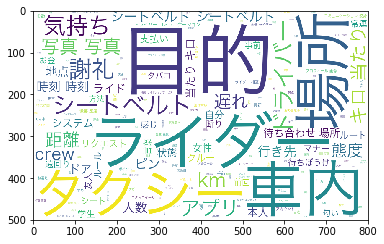

In [22]:
#形態素解析    
# パース
mecab = MeCab.Tagger()
parse = mecab.parse(data)
lines = parse.split('\n')
items = (re.split('[\t,]', line) for line in lines)

#ワードクラウド用のテキスト格納
w = '' #ワードクラウド用の名詞を格納

# 名詞抽出
for item in items:
    # 名詞のみ抽出
    if item[0] not in ('EOS', '', 't', 'ー') and item[1] == '名詞' and item[2] == '一般' :
        #print(item[0])
        w += " " + item[0]

# ワードクラウド生成
wordcloud = WordCloud(background_color="white"
                      ,font_path="/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"
                      ,width=800
                      ,height=500).generate(w)

# 画像生成
plt.imshow(wordcloud)
plt.show()

In [23]:
# 名詞をリストに格納
cnt_words = [item[0]
         for item in items
         if (item[0] not in ('EOS', '', 't', 'ー') and
             item[1] == '名詞' and item[2] == '一般')]

print(cnt_words)
# 頻度順に出力
counter = Counter(cnt_words)
#print(counter)
for word, count in counter.most_common():
    print(f"{word}\t{count}")

[]
